In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
import pandas as pd
df1 = pd.read_csv('train1_news.csv', engine='python')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20736 entries, 0 to 20735
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20733 non-null  object 
 1   id          20733 non-null  object 
 2   headline    20175 non-null  object 
 3   written_by  18780 non-null  object 
 4   news        20693 non-null  object 
 5   label       20717 non-null  float64
dtypes: float64(1), object(5)
memory usage: 972.1+ KB


In [4]:
df1.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0.0
1,1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,0.0
2,2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€� while discu...",0.0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0.0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1.0


In [5]:
df1.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0.0
1,1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,0.0
2,2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€� while discu...",0.0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0.0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1.0


In [6]:
data= df1[["id", "headline","written_by","news","label"]] 
data

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0.0
1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,0.0
2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€� while discu...",0.0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0.0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1.0
...,...,...,...,...,...
20731,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1.0
20732,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1.0
20733,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1.0
20734,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"Itâ€™s officially summer, and the Society Bout...",0.0


In [7]:
print ('Shape = >',data.shape)

Shape = > (20736, 5)


In [8]:
data.isnull().sum()

id               3
headline       561
written_by    1956
news            43
label           19
dtype: int64

In [9]:
data['written_by'] = data['written_by'].fillna(data['written_by'].mode()[0])
data['headline'] = data['headline'].fillna(data['headline'].mode()[0])
data['news'] = data['news'].fillna(data['news'].mode()[0])
data['label'] = data['label'].fillna(data['label'].mode()[0])

<ipython-input-9-2e8daf2abe27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['written_by'] = data['written_by'].fillna(data['written_by'].mode()[0])
<ipython-input-9-2e8daf2abe27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['headline'] = data['headline'].fillna(data['headline'].mode()[0])
<ipython-input-9-2e8daf2abe27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [11]:
data.dropna(axis=0,inplace=True)

<ipython-input-11-ed33c48db978>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0,inplace=True)


In [12]:
data.isnull().sum()

id            0
headline      0
written_by    0
news          0
label         0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20733 entries, 0 to 20735
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          20733 non-null  object 
 1   headline    20733 non-null  object 
 2   written_by  20733 non-null  object 
 3   news        20733 non-null  object 
 4   label       20733 non-null  float64
dtypes: float64(1), object(4)
memory usage: 971.9+ KB


In [14]:
print ('fake and not fake','\n',data.label.value_counts())

fake and not fake 
 1.0    10385
0.0    10348
Name: label, dtype: int64


In [15]:
#New column for Length of message
data['length'] = data.news.str.len()
data.head(5)

<ipython-input-15-0bf50fe07196>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data.news.str.len()


,id,headline,written_by,news,label,length
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0.0,8064
1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,0.0,6253
2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€� while discu...",0.0,441
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0.0,6662
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1.0,9290


In [16]:
data['detail_news']= data["headline"].astype(str) +" "+ data["news"].astype(str)
data.head(5)

<ipython-input-16-e27838cdf6c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['detail_news']= data["headline"].astype(str) +" "+ data["news"].astype(str)


,id,headline,written_by,news,label,length,detail_news
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0.0,8064,Ethics Questions Dogged Agriculture Nominee as...
1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,0.0,6253,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...
2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€� while discu...",0.0,441,Cotton to House: â€™Do Not Walk the Plank and ...
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0.0,6662,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1.0,9290,A Digital 9/11 If Trump Wins Finian Cunningh...


In [17]:
data.drop('headline',axis=1,inplace=True)
data.drop('news',axis=1,inplace=True)
data.head()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,id,written_by,label,length,detail_news
0,9653,Eric Lipton and Steve Eder,0.0,8064,Ethics Questions Dogged Agriculture Nominee as...
1,10041,David Waldstein,0.0,6253,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...
2,19113,Pam Key,0.0,441,Cotton to House: â€™Do Not Walk the Plank and ...
3,6868,Jess Bidgood,0.0,6662,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,7596,Finian Cunningham,1.0,9290,A Digital 9/11 If Trump Wins Finian Cunningh...


In [18]:
# New column (clean_length) after puncuations,stopwords removal
data['clean_length'] = data.detail_news.str.len()
data.head()

<ipython-input-18-68711f072451>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_length'] = data.detail_news.str.len()


,id,written_by,label,length,detail_news,clean_length
0,9653,Eric Lipton and Steve Eder,0.0,8064,Ethics Questions Dogged Agriculture Nominee as...,8149
1,10041,David Waldstein,0.0,6253,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,6328
2,19113,Pam Key,0.0,441,Cotton to House: â€™Do Not Walk the Plank and ...,546
3,6868,Jess Bidgood,0.0,6662,"Paul LePage, Besieged Maine Governor, Sends Co...",6763
4,7596,Finian Cunningham,1.0,9290,A Digital 9/11 If Trump Wins Finian Cunningh...,9319


In [19]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

In [20]:
def clean_text(text, remove_stopwords = True):
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text,  
                  flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
    return text

In [21]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [22]:
train, test = train_test_split(data, test_size=0.3, random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['detail_news']), tags=[r.label]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['detail_news']), tags=[r.label]), axis=1)

In [24]:
data['detail_news']=data['detail_news'].apply(str)

In [25]:
train_tagged.values[5]

TaggedDocument(words=['deal', 'with', 'devil', 'red', 'cross', 'seeks', 'talks', 'with', 'isis', 'to', 'help', 'civilians', 'in', 'mosul', 'fighting', '17', 'mins', 'ago', 'views', 'comments', 'likes', 'drone', 'footage', 'shows', 'the', 'devastation', 'caused', 'by', 'twin', 'earthquakes', 'that', 'rocked', 'borgo', "sant'antonio", 'near', 'visso', 'which', 'left', 'buildings', 'reduced', 'to', 'rubble', 'or', 'partially', 'collapsed', 'central', 'italy', 'was', 'struck', 'twice', 'in', 'quick', 'succession', 'the', 'previous', 'day', 'with', 'the', 'first', 'tremor', 'hitting', 'it', 'at', 'around', '19:11', 'local', 'time', '17:11', 'gmt', 'the', 'quake', 'measured', '5.5', 'on', 'the', 'richter', 'scale', 'and', 'could', 'be', 'felt', 'as', 'far', 'as', 'rome', 'some', '240', 'km', '149', 'miles', 'shortly', 'after', 'second', 'quake', 'of', '6.1-magnitude', 'struck', 'at', 'around', '21:18', 'local', 'time', '19:18', 'gmt', 'buildings', 'were', 'shaking', 'some', 'parts', 'even', 

In [26]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [27]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 14513/14513 [00:00<00:00, 464916.13it/s]


In [28]:
#time
for epoch in range(45):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 14513/14513 [00:00<00:00, 793543.57it/s]


In [29]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [30]:
y_train_dbow, X_train_dbow = vec_for_learning(model_dbow, train_tagged)
y_test_dbow, X_test_dbow = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train_dbow, y_train_dbow)
y_pred_dbow = logreg.predict(X_test_dbow)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test_dbow, y_pred_dbow))
print('Testing F1 score: {}'.format(f1_score(y_test_dbow, y_pred_dbow, average='weighted')))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing accuracy 0.6334405144694534
Testing F1 score: 0.6334311118685694


In [31]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 14513/14513 [00:00<00:00, 195421.79it/s]


In [32]:
#time
for epoch in range(45):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 14513/14513 [00:00<00:00, 968095.90it/s]


In [33]:
y_train_dm, X_train_dm = vec_for_learning(model_dmm, train_tagged)
y_test_dm, X_test_dm = vec_for_learning(model_dmm, test_tagged)
logreg.fit(X_train_dm, y_train_dm)
y_pred_dm = logreg.predict(X_test_dm)
print('Testing accuracy %s' % accuracy_score(y_test_dm, y_pred_dm))
print('Testing F1 score: {}'.format(f1_score(y_test_dm, y_pred_dm, average='weighted')))

Testing accuracy 0.5064308681672026
Testing F1 score: 0.506186686302301


In [34]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [35]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [36]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [41]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing accuracy 0.5940514469453376
Testing F1 score: 0.5940308194990136


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


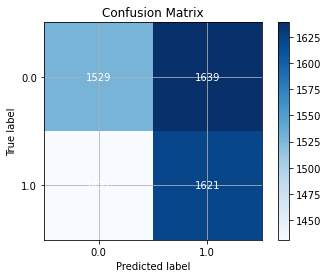

confusion matrix of logistic regression of Doc2vec using distributed memory


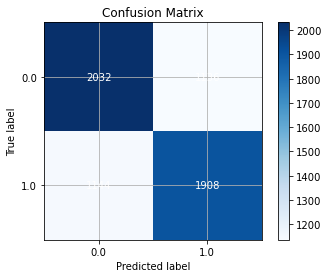

confusion matrix of logistic regression of Doc2vec using distributed bag of words


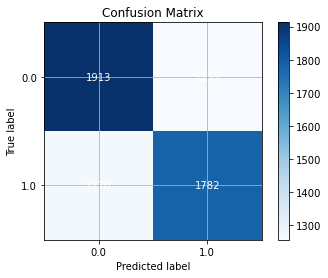

confusion matrix of logistic regression of Doc2vec combining both models


In [42]:
import scikitplot.plotters as skplt
def plot_cmat(y_test, y_pred):
    skplt.plot_confusion_matrix(y_test,y_pred)
    plt.show()
    
plot_cmat(y_test_dm, y_pred_dm)
print("confusion matrix of logistic regression of Doc2vec using distributed memory")
plot_cmat(y_test_dbow, y_pred_dbow)
print("confusion matrix of logistic regression of Doc2vec using distributed bag of words")
plot_cmat(y_test, y_pred)
print("confusion matrix of logistic regression of Doc2vec combining both models")

In [43]:
C = 1.0  
from sklearn import svm
svc = svm.SVC(kernel='linear', C=C).fit(X_train_dm, y_train_dm)
y_pred= svc.predict(X_test_dm)
print('Testing accuracy %s' % accuracy_score(y_test_dm, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test_dm, y_pred, average='weighted')))

Testing accuracy 0.4906752411575563
Testing F1 score: 0.3230243390881928


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


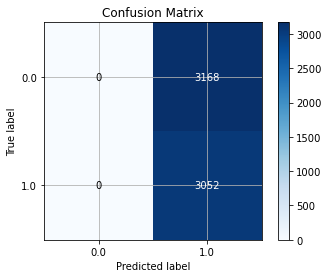

confusion matrix of SVM of Doc2vec using distributed memory


In [44]:

plot_cmat(y_test_dm, y_pred)
print("confusion matrix of SVM of Doc2vec using distributed memory")